<a href="https://colab.research.google.com/github/Young4424/Machine-Learning-Deep-learning-Myself/blob/main/00_DL_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = './cache', download = True,
    transform = transforms.Compose([transforms.ToTensor()])
    )

test_dataset = torchvision.datasets.FashionMNIST(
    root = './cache', download = True,
    transform = transforms.Compose([transforms.ToTensor()]),
    train = False)

100%|██████████| 26421880/26421880 [00:01<00:00, 17404308.83it/s]


Extracting ./cache/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./cache/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 311840.04it/s]


Extracting ./cache/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./cache/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5631786.17it/s]


Extracting ./cache/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./cache/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8929808.52it/s]

Extracting ./cache/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./cache/FashionMNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = 64)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size = 64)

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_map = {i : name for i, name in enumerate(class_names)}
class_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [6]:
label_idx = list(range(0, 10))
label_name = train_dataset.classes
labels_map = dict(zip(label_idx, label_name))

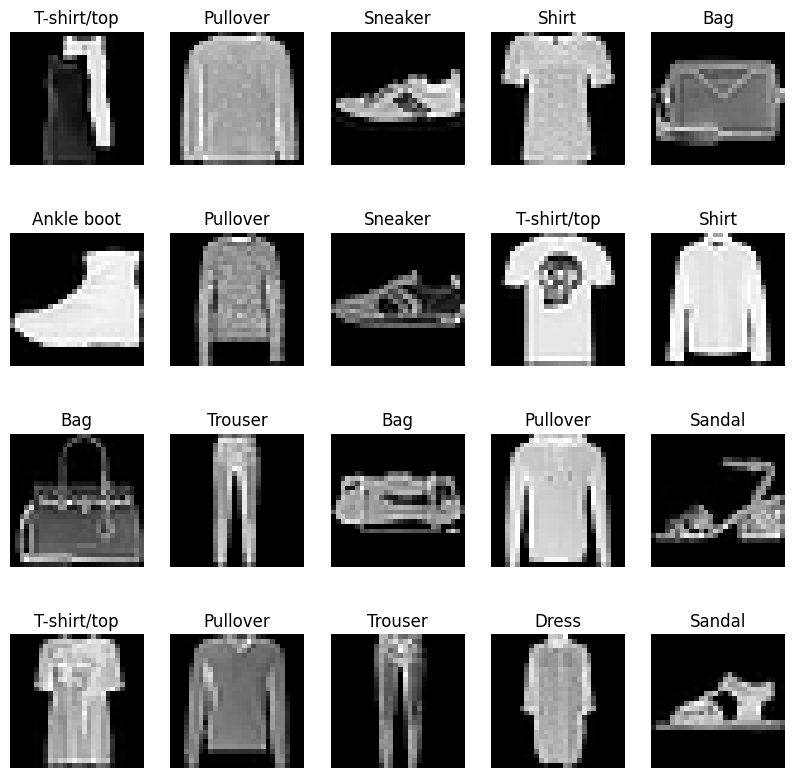

In [8]:
fig = plt.figure(figsize = (10, 10))

for i in range(1, 21):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0, :, :]
    fig.add_subplot(4, 5, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

In [44]:
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features = 28 * 28, out_features = 256)
        self.fc2 = nn.Linear(in_features = 256, out_features = 64)
        self.fc3 = nn.Linear(in_features = 64, out_features = 10)

    def forward(self, input_data):

        out = input_data.view(-1, 28 * 28)
        out = self.fc1(out)
        out = F.sigmoid(out)
        out = self.fc2(out)
        out = F.sigmoid(out)
        out = self.fc3(out)
        return out

In [45]:
# 모델 컴파일
lr = 0.001
model = FashionDNN()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [46]:
for epoch in range(10):

    total_correct = 0
    total = 0
    train_acc = 0

    for batch_idx, (images, labels)  in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_correct += (outputs.argmax(axis = 1) == labels).sum()
        total += len(labels)

        train_acc = (total_correct / total).item()
        if batch_idx % 300 == 0:
            print(f'train_acc : {train_acc:.4f}')

train_acc : 0.0469
train_acc : 0.1067
train_acc : 0.1159
train_acc : 0.1132
train_acc : 0.1094
train_acc : 0.1136
train_acc : 0.1126
train_acc : 0.1199
train_acc : 0.2188
train_acc : 0.1833
train_acc : 0.1712
train_acc : 0.1819
train_acc : 0.2969
train_acc : 0.2716
train_acc : 0.2588
train_acc : 0.2728
train_acc : 0.3594
train_acc : 0.3042
train_acc : 0.3065
train_acc : 0.3273
train_acc : 0.3906
train_acc : 0.3278
train_acc : 0.3374
train_acc : 0.3636
train_acc : 0.4375
train_acc : 0.3477
train_acc : 0.3604
train_acc : 0.3908
train_acc : 0.4844
train_acc : 0.3665
train_acc : 0.3817
train_acc : 0.4114
train_acc : 0.4688
train_acc : 0.3827
train_acc : 0.3992
train_acc : 0.4277
train_acc : 0.5000
train_acc : 0.3983
train_acc : 0.4159
train_acc : 0.4422


In [47]:
def train(model, train_loader, epoch):
    model.train()

    total_correct = 0
    total = 0

    train_acc = 0

    for batch_id, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_correct += (outputs.argmax(axis = 1) == labels).sum()
        total += len(labels)

        train_acc = (total_correct / total).item() * 100

    print(f'Train Epoch #{epoch + 1} - Loss : {loss:.4f} / Accuracy : {train_acc:.2f}%')
    return train_acc, loss.item()

In [48]:
def evaluation(model, test_loader):
    model.eval()

    total_correct = 0
    total = 0

    test_acc = 0

    with torch.no_grad():
        for batch_id, (images, labels) in enumerate(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            total_correct += (outputs.argmax(axis = 1) == labels).sum()
            total += len(labels)

            test_acc = (total_correct / total).item() * 100

    print(f'\t Test Loss : {loss:.4f} / Test Accuracy : {test_acc:.2f}%')
    return test_acc, loss.item()

# 모델 개선

In [63]:
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features = 28 * 28, out_features = 256)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features = 256, out_features = 64)
        self.fc3 = nn.Linear(in_features = 64, out_features = 10)

    def forward(self, input_data):

        out = input_data.view(-1, 28 * 28)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.drop(out) # 몇개를 전원 끄면서 과적합 방지, 일반화 유
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out

In [64]:
# 모델 컴파일
lr = 0.001
model = FashionDNN()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [65]:
epochs = 10
train_history = {'Accuracy':[], 'Loss':[]}
test_history = {'Accuracy':[], 'Loss':[]}

for epoch in tqdm.tqdm_notebook(range(epochs)):
    train_acc, train_loss = train(model, train_loader, epoch)
    test_acc, test_loss = evaluation(model, test_loader)

    train_history['Accuracy'].append(train_acc)
    train_history['Loss'].append(train_loss)
    test_history['Accuracy'].append(test_acc)
    test_history['Loss'].append(test_loss)

<ipython-input-65-d5c76a3071cc>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm.tqdm_notebook(range(epochs)):


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch #1 - Loss : 0.4294 / Accuracy : 79.80%
	 Test Loss : 0.2586 / Test Accuracy : 84.06%
Train Epoch #2 - Loss : 0.2960 / Accuracy : 85.26%
	 Test Loss : 0.2236 / Test Accuracy : 85.40%
Train Epoch #3 - Loss : 0.2614 / Accuracy : 86.54%
	 Test Loss : 0.1910 / Test Accuracy : 86.22%
Train Epoch #4 - Loss : 0.2642 / Accuracy : 87.37%
	 Test Loss : 0.2294 / Test Accuracy : 86.86%
Train Epoch #5 - Loss : 0.2736 / Accuracy : 87.98%
	 Test Loss : 0.2319 / Test Accuracy : 87.04%
Train Epoch #6 - Loss : 0.2652 / Accuracy : 88.39%
	 Test Loss : 0.1966 / Test Accuracy : 87.00%
Train Epoch #7 - Loss : 0.2317 / Accuracy : 88.76%
	 Test Loss : 0.1561 / Test Accuracy : 87.73%
Train Epoch #8 - Loss : 0.3028 / Accuracy : 89.07%
	 Test Loss : 0.1858 / Test Accuracy : 87.74%
Train Epoch #9 - Loss : 0.2287 / Accuracy : 89.35%
	 Test Loss : 0.1518 / Test Accuracy : 87.67%
Train Epoch #10 - Loss : 0.2407 / Accuracy : 89.70%
	 Test Loss : 0.1258 / Test Accuracy : 87.75%


# 학습 결과 시각화

In [57]:
train_acc = train_history['Accuracy']
valid_acc = test_history['Accuracy']

train_loss = train_history['Loss']
valid_loss = test_history['Loss']

epochs = range(1, len(train_loss) + 1)

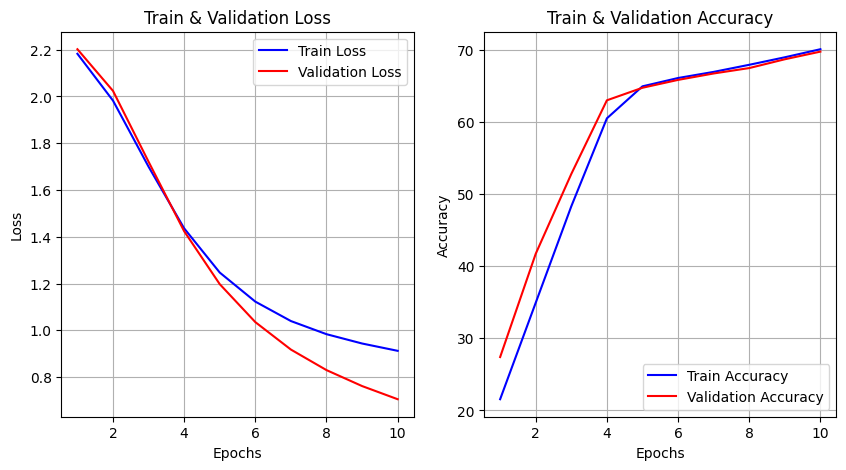

In [58]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, train_loss, color='blue', label='Train Loss')
ax1.plot(epochs, valid_loss, color='red', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train & Validation Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, train_acc, color='blue', label='Train Accuracy')
ax2.plot(epochs, valid_acc, color='red', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train & Validation Accuracy')
ax2.grid()
ax2.legend()

plt.show()




Activation 함수 : 시그모이드 함수 vs relu 함수. 이미지는 pixel 단위 0~255인데, relu 함수에 적합

# Adam 사용

In [61]:
train_acc = train_history['Accuracy']
valid_acc = test_history['Accuracy']

train_loss = train_history['Loss']
valid_loss = test_history['Loss']

epochs = range(1, len(train_loss) + 1)

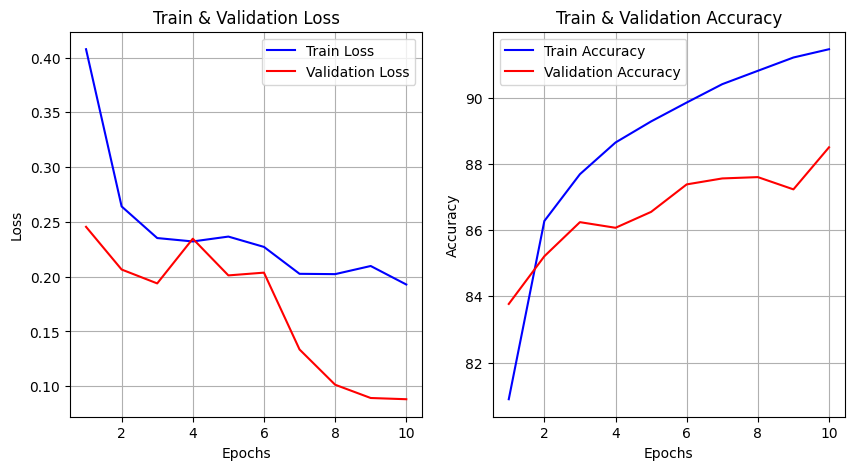

In [62]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, train_loss, color='blue', label='Train Loss')
ax1.plot(epochs, valid_loss, color='red', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train & Validation Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, train_acc, color='blue', label='Train Accuracy')
ax2.plot(epochs, valid_acc, color='red', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train & Validation Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 예측값 도출

In [66]:
pred_list = []
true_list = []

with torch.no_grad():
    for batch_id, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        pred_list.extend(outputs.argmax(axis = 1).tolist())
        true_list.extend(labels.tolist())

# 성능 평가

In [67]:
cm = confusion_matrix(true_list, pred_list)

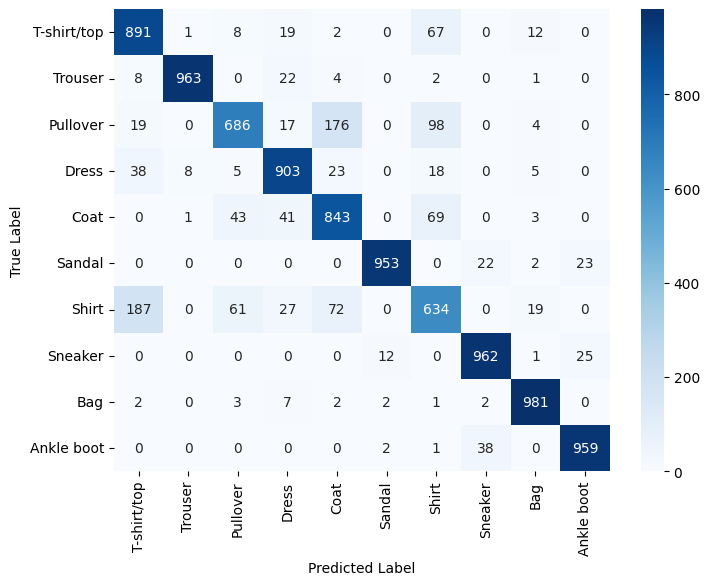

In [68]:
plt.figure(figsize=(8, 6))
classes = test_dataset.classes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# CNN 모델 설계

In [90]:
from torch.nn.modules.activation import ReLU

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1), # 흑백이라 채널이 1개
            nn.ReLU(), # activation function
            nn.MaxPool2d(kernel_size = 2, stride = 2), # stride : 움직이는 칸 수
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2), # stride : 움직이는 칸 수
        )

        # 이제 펼쳐서 넣어야 함
        self.fc1 = nn.Linear(in_features = 64 * 6 * 6, out_features = 256) # 계산하는 방식 따로 있음
        self.fc2 = nn.Linear(in_features = 256, out_features = 128)
        self.fc3 = nn.Linear(in_features = 128, out_features = 10)


    def forward(self, input_data):
        out = self.layer1(input_data) # 이미지 그대로 받음
        out = self.layer2(out)
        out = out.view(out.size(0),-1) # -1 : 알아서 채워줘
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out

In [91]:
# 모델 컴파일
lr = 0.001
model = FashionCNN()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [92]:
epochs = 10
train_history = {'Accuracy':[], 'Loss':[]}
test_history = {'Accuracy':[], 'Loss':[]}

for epoch in tqdm.tqdm_notebook(range(epochs)):
    train_acc, train_loss = train(model, train_loader, epoch)
    test_acc, test_loss = evaluation(model, test_loader)

    train_history['Accuracy'].append(train_acc)
    train_history['Loss'].append(train_loss)
    test_history['Accuracy'].append(test_acc)
    test_history['Loss'].append(test_loss)

<ipython-input-92-d5c76a3071cc>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm.tqdm_notebook(range(epochs)):


  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch #1 - Loss : 0.2735 / Accuracy : 83.63%
	 Test Loss : 0.2389 / Test Accuracy : 87.58%
Train Epoch #2 - Loss : 0.1799 / Accuracy : 89.21%
	 Test Loss : 0.1671 / Test Accuracy : 88.40%
Train Epoch #3 - Loss : 0.1679 / Accuracy : 90.79%
	 Test Loss : 0.1110 / Test Accuracy : 88.94%
Train Epoch #4 - Loss : 0.1177 / Accuracy : 91.83%
	 Test Loss : 0.1150 / Test Accuracy : 89.80%
Train Epoch #5 - Loss : 0.0999 / Accuracy : 92.66%
	 Test Loss : 0.1361 / Test Accuracy : 89.61%
Train Epoch #6 - Loss : 0.1215 / Accuracy : 93.35%
	 Test Loss : 0.1479 / Test Accuracy : 88.79%
Train Epoch #7 - Loss : 0.0844 / Accuracy : 93.78%
	 Test Loss : 0.1055 / Test Accuracy : 88.74%
Train Epoch #8 - Loss : 0.1131 / Accuracy : 94.37%
	 Test Loss : 0.0985 / Test Accuracy : 88.32%
Train Epoch #9 - Loss : 0.1551 / Accuracy : 94.67%
	 Test Loss : 0.2090 / Test Accuracy : 89.37%
Train Epoch #10 - Loss : 0.0862 / Accuracy : 94.96%
	 Test Loss : 0.0674 / Test Accuracy : 90.06%


In [93]:
train_acc = train_history['Accuracy']
valid_acc = test_history['Accuracy']

train_loss = train_history['Loss']
valid_loss = test_history['Loss']

epochs = range(1, len(train_loss) + 1)

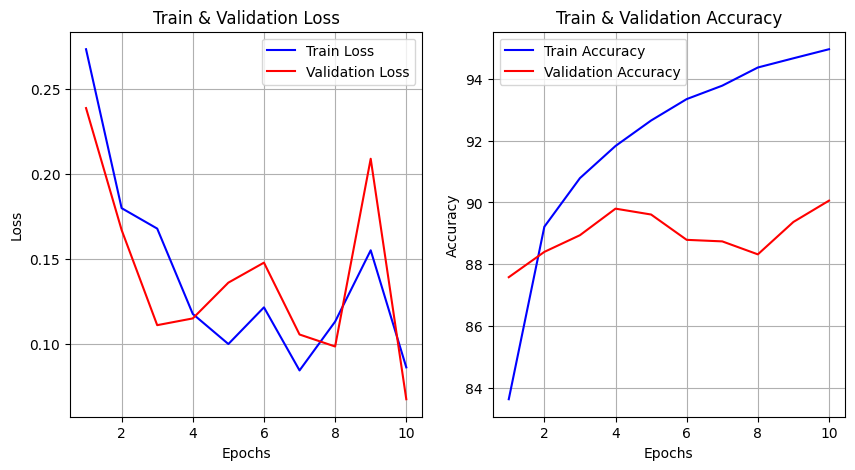

In [94]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, train_loss, color='blue', label='Train Loss')
ax1.plot(epochs, valid_loss, color='red', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train & Validation Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, train_acc, color='blue', label='Train Accuracy')
ax2.plot(epochs, valid_acc, color='red', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train & Validation Accuracy')
ax2.grid()
ax2.legend()

plt.show()